## Visuals For Some Core Questions

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading CSV:

In [10]:
path = '/Users/Marcy_Student/Desktop/Marcy-Modules/Mod4/M4-Final-Project/data/cleaned_hour.csv'
df = pd.read_csv(path)

# datetime didn't stay; no problem
df['dteday'] = pd.to_datetime(df['dteday'])
df.dtypes

Unnamed: 0               int64
instant                  int64
dteday          datetime64[ns]
season                   int64
yr                       int64
mnth                     int64
hr                       int64
holiday                  int64
weekday                  int64
workingday               int64
weathersit               int64
temp                   float64
atemp                  float64
hum                    float64
windspeed              float64
casual                   int64
registered               int64
cnt                      int64
season_names            object
month_names             object
day_name                object
dtype: object

***
### Some Initial Visuals (Fig)

In [11]:
# seasonal count
seasonal_count = df.groupby('season_names')['cnt'].sum().reset_index()

# monthly count
monthly_count = df.groupby('month_names')['cnt'].sum().reset_index().sort_values(by='cnt', ascending=False)

# daily count
daily_count = df.groupby(['weekday', 'day_name'])['cnt'].sum().reset_index().sort_values(by='weekday', ascending=True)

#hourly count
hourly_count = df.groupby('hr')['cnt'].sum().reset_index()

print(seasonal_count.max(), monthly_count.max(), daily_count.max(), hourly_count.max())

season_names     Winter
cnt             1061129
dtype: object month_names    September
cnt               351194
dtype: object weekday             6
day_name    Wednesday
cnt            487790
dtype: object hr         23
cnt    336860
dtype: int64


/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_4633/344129948.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(monthly_count['month_names'], rotation=45, ha='right')
/var/folders/gs/yv3dj4zx2tgdd5tw701ypspm0000gp/T/ipykernel_4633/344129948.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(daily_count['day_name'], rotation=45, ha='right')


Text(0.5, 1.0, 'Hourly Bike Usage')

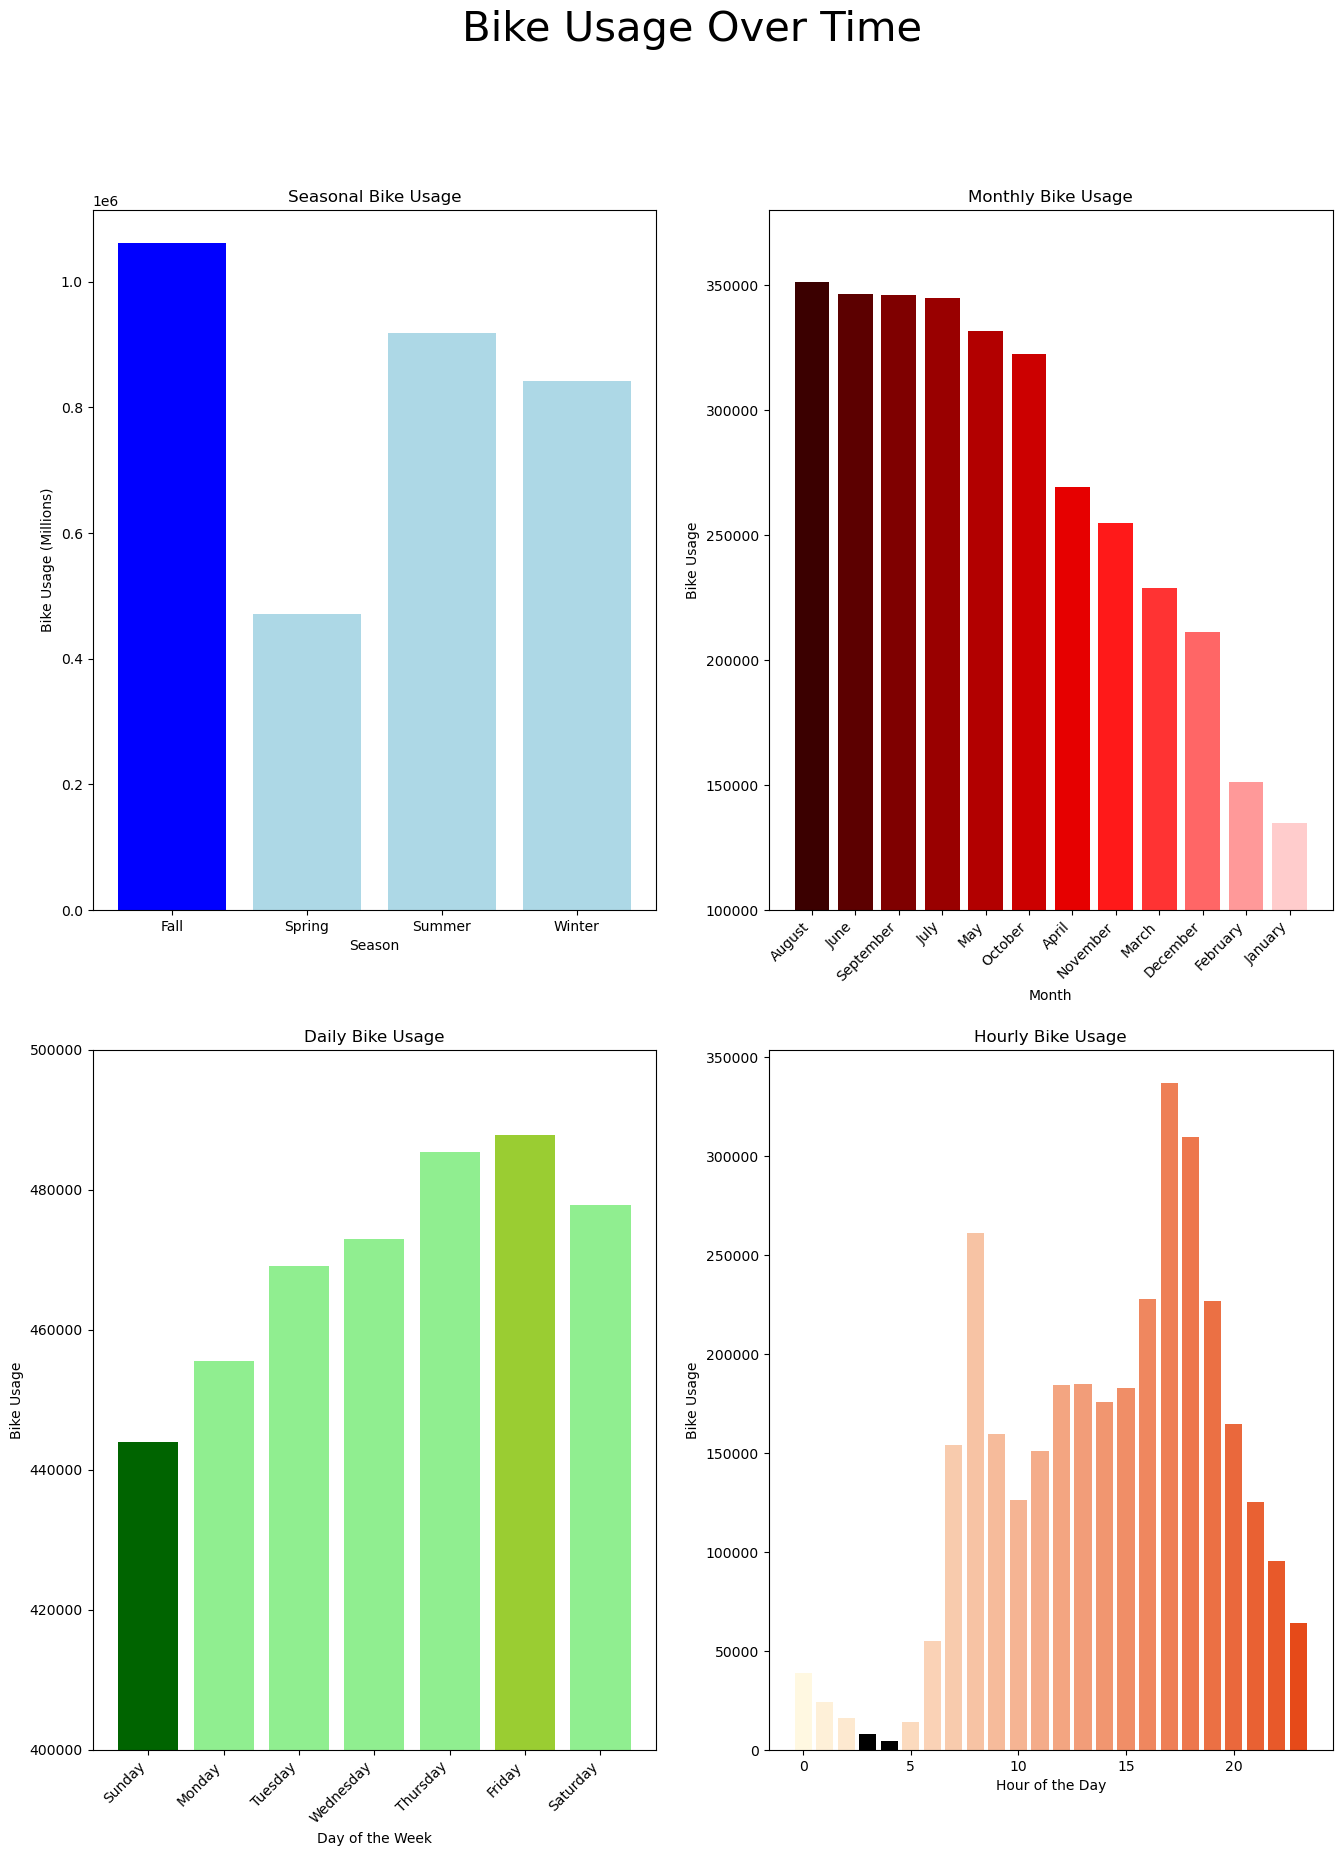

In [12]:
# plots

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16, 20)
fig.suptitle('Bike Usage Over Time', fontsize=30)



#seasonal
season_color = ['blue', 'lightblue', 'lightblue', 'lightblue']
axs[0, 0].bar(seasonal_count['season_names'], seasonal_count['cnt'], color=season_color)
axs[0, 0].set(xlabel='Season', ylabel='Bike Usage (Millions)')
axs[0, 0].set_title('Seasonal Bike Usage')



#monthly
red_shades = [
    "#3B0000",
    "#5C0000",
    "#7F0000",
    "#990000",
    "#B20000",
    "#CC0000",
    "#E60000",
    "#FF1919",
    "#FF3333",
    "#FF6666",
    "#FF9999",
    "#FFCCCC",
]
axs[0, 1].bar(monthly_count['month_names'], monthly_count['cnt'], color=red_shades)
axs[0, 1].set(xlabel='Month', ylabel='Bike Usage')
axs[0, 1].set_title('Monthly Bike Usage')
axs[0, 1].set_xticklabels(monthly_count['month_names'], rotation=45, ha='right')
axs[0, 1].set_ylim(100000, 380000)



# daily
daily_colors = ['darkgreen',
                'lightgreen',
                'lightgreen',
                'lightgreen',
                'lightgreen',
                'yellowgreen',
                'lightgreen' ]

axs[1, 0].bar(daily_count['day_name'], daily_count['cnt'], color=daily_colors)
axs[1, 0].set(xlabel='Day of the Week', ylabel='Bike Usage')
axs[1, 0].set_title('Daily Bike Usage')
axs[1, 0].set_xticklabels(daily_count['day_name'], rotation=45, ha='right')
axs[1, 0].set_ylim(400000, 500000)



#hourly
orange_shades = [
    "#FFF8E1",
    "#FEF0D8",
    "#FDE9D0",
    "black",
    "black",
    "#FBDABE",
    "#FAD2B6",
    "#F8CBAD",
    "#F7C3A4",
    "#F6BB9B",
    "#F5B493",
    "#F4AC8A",
    "#F3A581",
    "#F29D79",
    "#F19670",
    "#F08E67",
    "#EF875F",
    "#EE7F56",
    "#ED774D",
    "#EB7044",
    "#EA683C",
    "#E96133",
    "#E8592A",
    "#E64A19",
]
axs[1, 1].bar(hourly_count['hr'], hourly_count['cnt'],color=orange_shades)
axs[1, 1].set(xlabel='Hour of the Day', ylabel='Bike Usage')
axs[1, 1].set_title('Hourly Bike Usage')
#axs[1, 1].set_ylim(600, 800)

***
### Holiday Stuff

In [14]:
# counting holiday users I suppose
holidays_df = df[df['holiday']==1]

holidays_df.groupby(['mnth', 'month_names'])[['casual', 'registered', 'cnt']].sum().reset_index().sort_values(by='mnth', ascending=True)

,mnth,month_names,casual,registered,cnt
0,1,January,578,4671,5249
1,2,February,697,3539,4236
2,4,April,1840,7656,9496
3,5,May,4106,6035,10141
4,7,July,5627,7819,13446
5,9,September,3201,6184,9385
6,10,October,2388,8207,10595
7,11,November,3052,10505,13557
8,12,December,870,1460,2330


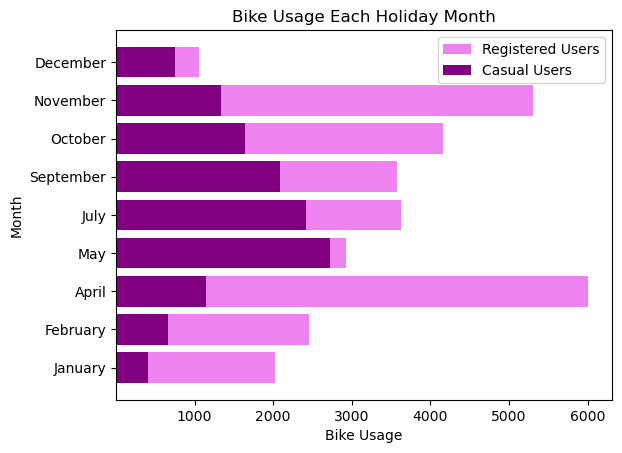

In [15]:
# charting dat
plt.barh(holidays_df['month_names'], holidays_df['registered'], color='violet', label='Registered Users')
plt.barh(holidays_df['month_names'], holidays_df['casual'], color='purple', label='Casual Users')
plt.xlabel('Bike Usage')
plt.ylabel('Month')
plt.title('Bike Usage Each Holiday Month')
plt.xticks(ticks=[100, 200, 300, 400, 500, 600], labels=[1000, 2000, 3000, 4000, 5000, 6000])
plt.legend()